In [1]:
!pip install imutils
#pip install --upgrade tensorflow keras

  Preparing metadata (setup.py) ... done
  Created wheel for imutils: filename=imutils-0.5.4-py3-none-any.whl size=25859 sha256=8073926294f884bd0206b2b8a9dfcac017fd80e6ff860e1c325fc093fab282b3
  Stored in directory: /root/.cache/pip/wheels/85/cf/3a/e265e975a1e7c7e54eb3692d6aa4e2e7d6a3945d29da46f2d7
Successfully built imutils


In [2]:
!pip install tensorflow-privacy
import tensorflow_privacy
from tensorflow_privacy.privacy.analysis import compute_dp_sgd_privacy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 359.4/359.4 kB 7.0 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.5/103.5 kB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 67.2 MB/s eta 0:00:00:00:010:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.7/126.7 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.6/532.6 kB 35.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 30.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 63.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 40.5 MB/s eta 0:00:00
  Attempting uninstall: mpmath
    Found existing installation: mpmath 1.3.0
    Uninstalling mpmath-1.3.0:
      Successfully uninstalled mpmath-1.3.0
  Att

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
import numpy as np
import random
import cv2
import os
from imutils import paths
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, LabelBinarizer  
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score, precision_score, recall_score
from keras.preprocessing.image import ImageDataGenerator

import tensorflow as tf  # tensorflow is an open source library 
from tensorflow.keras.models import Sequential # keras - neural network library
from tensorflow.keras.applications import Xception
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout, Dense
from tensorflow.keras.callbacks import ReduceLROnPlateau,EarlyStopping
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras import backend as K       # well optimized tensor manipulation library 
from tensorflow.keras import layers
from tensorflow import keras
import matplotlib.pyplot as plt
from random import randint
from tensorflow.keras.models import load_model

In [4]:
loss= tf.keras.losses.BinaryCrossentropy(reduction=tf.losses.Reduction.NONE)                                       # 'binary_crossentropy'
metrics = ['accuracy']
opt = tensorflow_privacy.DPKerasSGDOptimizer(l2_norm_clip=0.1,noise_multiplier=1,num_microbatches=1, learning_rate=0.01) # SGD(0.01)

In [5]:
def Xcep():
    img_size = 168
    
    model = Sequential() # Model is created
    model_name = Xception
    base = Xception(include_top=False, weights="imagenet", input_shape=(img_size,img_size,3), pooling='avg')#CNN based binary classification on a pre-trained model 
    for lay in base.layers: lay.trainable = True # false for transfer learning
    model.add(base)
    model.add(Dropout(0.8))                      #Dropout layers to prevent overfitting
    model.add(Flatten())
    model.add(Dense(64,'relu')) 
    model.add(Dropout(0.6))
    model.add(Dense(1,'sigmoid'))                #sigmoid as activation function and adam as optimizer
  
    return model
#print(model.get_weights()[0][0][0][0])

In [6]:
path = '/kaggle/input/skin-cancer-malignant-vs-benign'
# combine test, train
img_size = 168
ben_train_images = [] # os.listdir(path + '/train/benign')
mal_train_images = [] # os.listdir(path + '/train/malignant')
ben_test_images = []  #os.listdir(path + '/test/benign')
mal_test_images = []  # os.listdir(path + '/test/malignant')

ben_train_labels = [] # os.listdir(path + '/train/benign')
mal_train_labels = [] # os.listdir(path + '/train/malignant')
ben_test_labels = []  #os.listdir(path + '/test/benign')
mal_test_labels = []  # os.listdir(path + '/test/malignant')

images_ben = []                # contain flattened images
images_mal = [] 
labels_ben = []              # contain corresponding labels
labels_mal = []

ben = os.listdir(path + '/train/benign')    #ben_train + ben_test
mal = os.listdir(path + '/train/malignant') #mal_train + mal_test
#print(mal)
random.shuffle(ben)
random.shuffle(mal)
   # ben=ben[0:389]
   # mal=mal[0:480]
                   
    # Let benign be 0 and malignant be 1

for i in ben:
    x = path + '/train/benign/' + i
    img = cv2.cvtColor(cv2.imread(x), cv2.COLOR_BGR2RGB) #Convert Image from BGR to RGB 
    img = cv2.resize(img,(img_size,img_size))                      #Resizing the image
    img = img/255                                        #normalising 
    ben_train_images.append(img)                          #Flattens to 1D array
    ben_train_labels.append(0)
    
for i in mal:
    x = path + '/train/malignant/' + i
    img = cv2.imread(x)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img,(img_size,img_size))
    img = img/255 # normalising 
    mal_train_images.append(img)
    mal_train_labels.append(1)
    
ben = os.listdir(path + '/test/benign')    #ben_train + ben_test
mal = os.listdir(path + '/test/malignant') #mal_train + mal_test
random.shuffle(ben)
random.shuffle(mal)
   # ben=ben[0:389]
   # mal=mal[0:480]
                   
    # Let benign be 0 and malignant be 1

for i in ben:
    x = path + '/test/benign/' + i
    img = cv2.cvtColor(cv2.imread(x), cv2.COLOR_BGR2RGB) #Convert Image from BGR to RGB 
    img = cv2.resize(img,(img_size,img_size))                      #Resizing the image
    img = img/255                                        #normalising 
    ben_test_images.append(img)                          #Flattens to 1D array
    ben_test_labels.append(0)
for i in mal:
    x = path + '/test/malignant/' + i
    img = cv2.imread(x)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img,(img_size,img_size))
    img = img/255 # normalising 
    mal_test_images.append(img)
    mal_test_labels.append(1)
    
ben_train_images = np.array(ben_train_images)
mal_train_images = np.array(mal_train_images)

ben_train_labels = np.array(ben_train_labels)
mal_train_labels = np.array(mal_train_labels)

ben_test_images = np.array(ben_test_images)
mal_test_images = np.array(mal_test_images)

ben_test_labels = np.array(ben_test_labels)
mal_test_labels = np.array(mal_test_labels)

print(f'train_images_ben, test = {ben_train_images.shape, ben_test_images.shape}, train_images_mal = {mal_train_images.shape, mal_test_images.shape}')
print(f'train_labels_ben = {ben_train_labels.shape, ben_test_labels.shape},labels_mal = {mal_train_labels.shape, mal_test_labels.shape}')

train_images_ben, test = ((1440, 168, 168, 3), (360, 168, 168, 3)), train_images_mal = ((1197, 168, 168, 3), (300, 168, 168, 3))
train_labels_ben = ((1440,), (360,)),labels_mal = ((1197,), (300,))


In [7]:
iid = 0
if iid:
    print('iid')
    client_0_train_images = np.concatenate((ben_train_images[:470], mal_train_images[:389]), axis = 0)
    print(f'client 0, ben = {len(ben_train_images[:470])} and mal = {len(mal_train_images[:389])}')
    client_0_train_labels = np.concatenate((ben_train_labels[:470], mal_train_labels[:389]), axis = 0)

    client_1_train_images = np.concatenate((ben_train_images[470:950], mal_train_images[389:767]), axis = 0)
    print(f'client 1, ben = {len(ben_train_images[470:950])} and mal = {len(mal_train_images[389:767])}')
    client_1_train_labels = np.concatenate((ben_train_labels[470:950], mal_train_labels[389:767]), axis = 0)

    client_2_train_images = np.concatenate((ben_train_images[950:], mal_train_images[767:]), axis = 0)
    print(f'client 2, ben = {len(ben_train_images[950:])} and mal = {len(mal_train_images[767:])}')
    client_2_train_labels = np.concatenate((ben_train_labels[950:], mal_train_labels[767:]), axis = 0)
else:  
    print('non-iid')
    # noniid
    client_0_train_images = np.concatenate((ben_train_images[:1220], mal_train_images[:100]),axis = 0) 
    print(f'client 0, ben = {len(ben_train_images[:1220])} and mal = {len(mal_train_images[:100])}')
    client_0_train_labels = np.concatenate((ben_train_labels[:1220], mal_train_labels[:100]),axis = 0)

    client_1_train_images = np.concatenate((ben_train_images[1220:1345], mal_train_images[100:210]),axis = 0)
    print(f'client 1, ben = {len(ben_train_images[1220:1345])} and mal = {len(mal_train_images[100:210])}')
    client_1_train_labels = np.concatenate((ben_train_labels[1220:1345], mal_train_labels[100:210]),axis = 0)

    client_2_train_images = np.concatenate((ben_train_images[1345:], mal_train_images[210:]),axis = 0)
    print(f'client 2, ben = {len(ben_train_images[1345:])} and mal = {len(mal_train_images[210:])}')
    client_2_train_labels = np.concatenate((ben_train_labels[1345:], mal_train_labels[210:]),axis = 0)

client_0_test_images = np.concatenate((ben_test_images[:120], mal_test_images[:100]),axis = 0)
client_0_test_labels = np.concatenate((ben_test_labels[:120], mal_test_labels[:100]),axis = 0)

client_1_test_images = np.concatenate((ben_test_images[120:240], mal_test_images[100:200]),axis = 0)
client_1_test_labels = np.concatenate((ben_test_labels[120:240], mal_test_labels[100:200]),axis = 0)

client_2_test_images = np.concatenate((ben_test_images[240:], mal_test_images[200:]),axis = 0)
client_2_test_labels = np.concatenate((ben_test_labels[240:], mal_test_labels[200:]),axis = 0)

client_data_train_images = {}
client_data_train_images['client0'] = client_0_train_images
client_data_train_images['client1'] = client_1_train_images
client_data_train_images['client2'] = client_2_train_images

client_data_test_images = {}
client_data_test_images['client0'] = client_0_test_images
client_data_test_images['client1'] = client_1_test_images
client_data_test_images['client2'] = client_2_test_images

client_data_train_labels = {}
client_data_train_labels['client0'] = client_0_train_labels
client_data_train_labels['client1'] = client_1_train_labels
client_data_train_labels['client2'] = client_2_train_labels

client_data_test_labels = {}
client_data_test_labels['client0'] = client_0_test_labels
client_data_test_labels['client1'] = client_1_test_labels
client_data_test_labels['client2'] = client_2_test_labels

#print(f' client0 = images = {client_0_images.shape} and labels = {client_0_labels.shape}')
#print(f' client1 = images = {client_1_images.shape} and labels = {client_1_labels.shape}')
#print(f' client2 = images = {client_2_images.shape} and labels = {client_2_labels.shape}')

#client_0_train_images, client_0_test_images, client_0_train_labels, client_0_test_labels = train_test_split(client_0_images,client_0_labels, test_size = 0.2)
#client_1_train_images, client_1_test_images, client_1_train_labels, client_1_test_labels = train_test_split(client_1_images,client_1_labels, test_size = 0.2)
#client_2_train_images, client_2_test_images, client_2_train_labels, client_2_test_labels = train_test_split(client_2_images,client_2_labels, test_size = 0.2)

print(f' client0 = images = {client_0_train_images.shape, client_0_test_images.shape} and labels = {client_0_train_labels.shape, client_0_test_labels.shape}')
print(f' client1 = images = {client_1_train_images.shape, client_1_test_images.shape} and labels = {client_1_train_labels.shape, client_1_test_labels.shape}')
print(f' client2 = images = {client_2_train_images.shape, client_2_test_images.shape} and labels = {client_2_train_labels.shape, client_2_test_labels.shape}')

initial='client'
N = 3
client_names = ['{}{}'.format(initial, i) for i in range(N)]

non-iid
client 0, ben = 1220 and mal = 100
client 1, ben = 125 and mal = 110
client 2, ben = 95 and mal = 987
 client0 = images = ((1320, 168, 168, 3), (220, 168, 168, 3)) and labels = ((1320,), (220,))
 client1 = images = ((235, 168, 168, 3), (220, 168, 168, 3)) and labels = ((235,), (220,))
 client2 = images = ((1082, 168, 168, 3), (220, 168, 168, 3)) and labels = ((1082,), (220,))


In [8]:
#for i in range(3): shutil.rmtree(f'round{i}')
#for i in range(3): os.mkdir(f'round{i}')

path = '/kaggle/input/skin-cancer-malignant-vs-benign'
path_model = '/kaggle/working/'

In [9]:
round0 = {}

tr_acc_0 = {}
tr_loss_0 = {}

test_acc_0 = {}
test_loss_0 = {}

tr_loss_all = {}
test_acc_all = {}

In [10]:
def process_train_test(weights, client, epochs):
    
    loss= tf.keras.losses.BinaryCrossentropy(reduction=tf.losses.Reduction.NONE)                                       # 'binary_crossentropy'
    metrics = ['accuracy']
    opt = tensorflow_privacy.DPKerasSGDOptimizer(l2_norm_clip=0.1,noise_multiplier=1,num_microbatches=1, learning_rate=0.01)  # SGD(0.01)
    model = Xcep()
    model.compile(loss = loss, optimizer = opt, metrics = metrics)
    model.set_weights(weights)
    
  #  global path                        
  
    train_images, train_labels = client_data_train_images[client], client_data_train_labels[client] 
    
    test_images, test_labels = client_data_test_images[client], client_data_test_labels[client] 
    h = model.fit(train_images,train_labels, validation_data = (test_images, test_labels),epochs=epochs,batch_size=10, verbose = 0)

  #  path_save = '/content/round1/'
  #  model.save(path_save + "client2_round1.h5")
  #  print("Model of client 3 saved")
    return model, h.history['accuracy'], h.history['loss'], h.history['val_accuracy'], h.history['val_loss']

In [11]:
# round 0
N = 3 # number of clients
epochs = 1                        # local epochs clients
print('round 0')

for n in range(N):
    model = Xcep()
    print(f'client {n}')
    model, tr_a, tr_l, test_a, test_l = process_train_test(model.get_weights(), f'client{n}', epochs)
   # tr_acc_0[f'client{n}'] = tr_a
    tr_loss_all[f'client{n}'] = [tr_l[epochs-1]]
    test_acc_all[f'client{n}'] = [test_a[epochs-1]]
   # test_loss_0[f'client{n}'] = test_l
    round0[f'client{n}'] = model

round 0
83683744/83683744 [==============================] - 1s 0us/step
client 0
client 1
client 2


In [12]:
def evaluate(weights, client):
    
    loss= tf.keras.losses.BinaryCrossentropy(reduction=tf.losses.Reduction.NONE)                                       # 'binary_crossentropy'
    metrics = ['accuracy']
    opt = tensorflow_privacy.DPKerasSGDOptimizer(l2_norm_clip=0.1,noise_multiplier=1,num_microbatches=1, learning_rate=0.01)  #SGD(0.01)
    
    model = Xcep()
    model.compile(loss = loss, optimizer = opt, metrics = metrics)
    model.set_weights(weights)
    
    test_images, test_labels = client_data_test_images[client], client_data_test_labels[client] 
  
    l,a = model.evaluate(test_images,test_labels,verbose=0)
    print('curr_acc: {:.4%} | curr_loss: {:.4} '.format(a, l))
    return a,l

In [13]:
def scale_model_weights(weight, scalar):
    weight_final = []
    steps = len(weight)
    for i in range(steps):
        weight_final.append(scalar * weight[i])
    return weight_final # list of scaled weights of the local model

# list containing scaled weights of all local models / clients
def sum_scaled_weights(scaled_weight_list):
    '''Return the sum of the listed scaled weights. The is equivalent to scaled avg of the weights'''
    avg_grad = list()
    #get the average grad accross all client gradients
    for grad_list_tuple in zip(*scaled_weight_list):
        layer_mean = tf.math.reduce_sum(grad_list_tuple, axis=0)
        avg_grad.append(layer_mean)
        
    return avg_grad

def aggregate(files):
    scaled_local_weight_list = list()
    c = 0
    model = Xcep()
    for m in files.values(): 
        sca_factor =  [0.5006,0.0891,0.4103]     # [0.3257, 0.3254, 0.3489]    # [0.5006,0.0891,0.4103]     
        #path=directory+'/'+i
        #print(path)
       # model = load_model(directory + p)
        scaled_weights = scale_model_weights(m.get_weights(), sca_factor[c])
        c += 1
        scaled_local_weight_list.append(scaled_weights)
        average_weights = sum_scaled_weights(scaled_local_weight_list)
   # model.set_weights(average_weights)
    return average_weights

#def avg_loss_acc()

In [14]:
# initialize global model
global_model = Xcep()  # class object
comm_rounds = 10
round_curr = dict(round0)

#commence global training loop 
for comm_round in range(comm_rounds):
            
    print(f'comm round = {comm_round}')
    round_prev = round_curr.copy()
    global_weights = aggregate(round_prev)
    round_curr = {}
    
    avg_train_loss = 0
    avg_test_acc = 0

    #loop through each client and create new local model
    for c, client in enumerate(client_names):

        print(f'client name = {client}')
        test_a, test_l = evaluate(global_weights, client)
        # add to graph (client, round number)
        local_model = Xcep()
          
        local_model.compile(loss = loss, optimizer = opt, metrics = metrics)
        #set local model weight to the weight of the global model
        local_model.set_weights(global_weights)
        
        #fit local model with client's data
        train_images, train_labels = client_data_train_images[client], client_data_train_labels[client] 
       
        test_images, test_labels = client_data_test_images[client], client_data_test_labels[client] 
       
        h = model.fit(train_images,train_labels, validation_data = (test_images, test_labels),epochs=epochs,batch_size=10, verbose = 0)
        
        tr_loss = h.history['loss'][epochs-1]
        print('aggregated_test_acc: {:.4%} | local_train_loss: {:.4} '.format(test_a, tr_loss))
        
        round_curr[client] = model
        #scale the model weights and add to list
       
        tr_loss_all[client].append(tr_loss)
        test_acc_all[client].append(test_a)

        #clear session to free memory after each communication round
        
        K.clear_session()


comm round = 0
client name = client0
curr_acc: 44.5455% | curr_loss: 0.6996 
aggregated_test_acc: 44.5455% | local_train_loss: 1.035 
client name = client1
curr_acc: 43.6364% | curr_loss: 0.6978 
aggregated_test_acc: 43.6364% | local_train_loss: 0.8093 
client name = client2
curr_acc: 43.1818% | curr_loss: 0.6975 
aggregated_test_acc: 43.1818% | local_train_loss: 0.6743 
comm round = 1
client name = client0
curr_acc: 43.1818% | curr_loss: 0.713 
aggregated_test_acc: 43.1818% | local_train_loss: 1.031 
client name = client1
curr_acc: 46.8182% | curr_loss: 0.7175 
aggregated_test_acc: 46.8182% | local_train_loss: 0.8186 
client name = client2
curr_acc: 47.7273% | curr_loss: 0.7141 
aggregated_test_acc: 47.7273% | local_train_loss: 0.6511 
comm round = 2
client name = client0
curr_acc: 43.1818% | curr_loss: 0.756 
aggregated_test_acc: 43.1818% | local_train_loss: 1.094 
client name = client1
curr_acc: 43.1818% | curr_loss: 0.7533 
aggregated_test_acc: 43.1818% | local_train_loss: 0.906 
c

# Evaluate

In [15]:
for client in client_names:
   # tr_loss_all[client][0] = tr_loss_all[client][0][epochs-1]
   # test_acc_all[client][0] = test_acc_all[client][0][epochs-1]
    print(f'client {client} train loss  = {tr_loss_all[client]}')
    print(f'client {client} test acc = {test_acc_all[client]}')

client client0 train loss  = [1.0631142854690552, 1.0353302955627441, 1.0306915044784546, 1.0941272974014282, 1.135209560394287, 1.062031865119934, 1.0671628713607788, 1.171688437461853, 1.1542303562164307, 1.1317952871322632, 1.2176451683044434]
client client0 test acc = [0.4227272868156433, 0.44545453786849976, 0.4318181872367859, 0.4318181872367859, 0.4636363685131073, 0.48636364936828613, 0.47727271914482117, 0.4545454680919647, 0.48181816935539246, 0.48636364936828613, 0.48181816935539246]
client client1 train loss  = [0.9014539122581482, 0.8092669248580933, 0.8185892105102539, 0.9060210585594177, 0.8890079855918884, 1.0177814960479736, 0.9404752850532532, 1.0069879293441772, 0.9915422201156616, 0.9082269668579102, 1.0275951623916626]
client client1 test acc = [0.4954545497894287, 0.4363636374473572, 0.4681818187236786, 0.4318181872367859, 0.44090908765792847, 0.5181818008422852, 0.4545454680919647, 0.4727272689342499, 0.4727272689342499, 0.5, 0.48636364936828613]
client client2 t

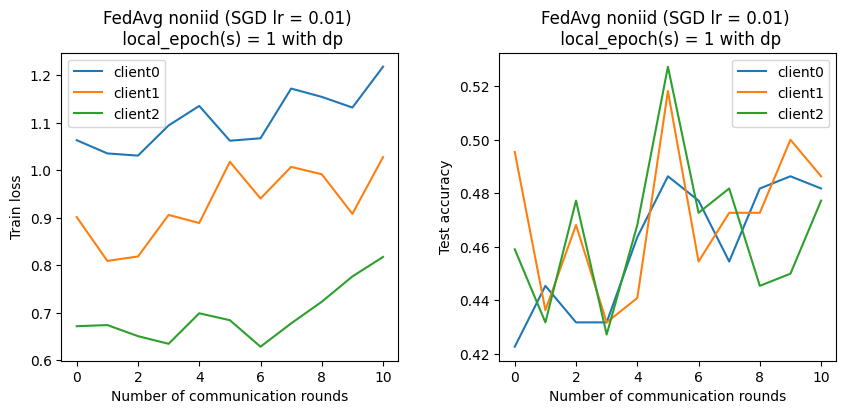

In [16]:
# graph

x = np.arange(comm_rounds + 1)
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
plt.subplots_adjust(wspace=0.3)

for client in client_names:
    ax1.plot(x, tr_loss_all[client], label=client)

ax1.legend()
ax1.set_title('FedAvg noniid (SGD lr = 0.01) \n local_epoch(s) = 1 with dp')
ax1.set_xlabel('Number of communication rounds')
ax1.set_ylabel('Train loss')

    
for client in client_names:
    ax2.plot(x, test_acc_all[client], label=client)

ax2.legend()
ax2.set_title('FedAvg noniid (SGD lr = 0.01) \n local_epoch(s) = 1 with dp')
ax2.set_xlabel('Number of communication rounds')
ax2.set_ylabel('Test accuracy')

plt.show()